In [55]:
import numpy as np

In [1]:
import tensorflow as tf 
from tensorflow.keras import models,layers 
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE =256
BATCH_SIZE = 32
CHANNELS=3
EPOCHS=5

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
        "Plantdisease",
         shuffle=True,
         image_size=(IMAGE_SIZE,IMAGE_SIZE),
         batch_size =BATCH_SIZE)

Found 2152 files belonging to 3 classes.


In [4]:
class_names =dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
len(dataset)

68

In [6]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[2 0 0 1 1 1 0 1 1 2 0 1 0 0 1 0 0 0 0 0 1 0 1 1 0 1 2 0 1 0 0 1]


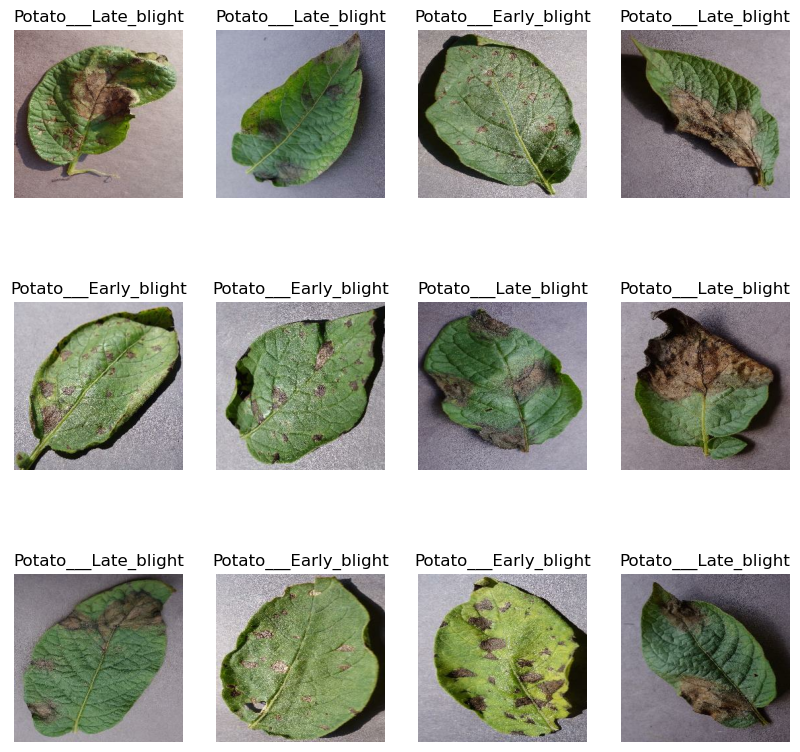

In [7]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [8]:
len(dataset)

68

In [9]:
train_size=0.8
len(dataset)*train_size

54.400000000000006

In [10]:
train_dataset = dataset.take(54)
len(train_dataset)

54

In [11]:
test_dataset = dataset.skip(54) 
len(test_dataset)

14

In [12]:
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [13]:
val_dataset = test_dataset.take(6)
len(val_dataset)

6

In [14]:
test_dataset = test_dataset.skip(6) 
len(test_dataset)

8

In [16]:
def get_dataset_partitions_tf(ds, train_split=0.8 , val_split=0.1 ,test_split=0.1,shuffle=True, shuffle_size=10000):
    
    ds_size = len(ds)
    
    if shuffle:
         ds = ds.shuffle(shuffle_size,seed=12)
            
    train_size = int(train_split * ds_size)
    val_size = int(val_split*ds_size)
    
    train_dataset=ds.take(train_size)
    
    val_ds = ds.skip(train_size).take(val_size)
    test_datset = ds.skip(train_size).skip(val_size)
    return train_dataset,val_dataset,test_dataset

In [17]:
train_dataset,val_dataset,test_dataset =get_dataset_partitions_tf(dataset)

In [18]:
len(train_dataset)

54

In [19]:
len(val_dataset)

6

In [20]:
len(test_dataset)

8

In [21]:
train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_dataset = val_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_dataset = test_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [22]:
resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    tf.keras.layers.Rescaling(1.0/255)
])


In [23]:
data_augumentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2),
])

In [24]:
input_shape=(BATCH_SIZE ,IMAGE_SIZE , IMAGE_SIZE,CHANNELS)
n_classes = 3
model = models.Sequential([
    resize_and_rescale,
    data_augumentation,
    layers.Conv2D(32,(3,3),activation='relu', input_shape= input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes , activation ='softmax'),
])

model.build(input_shape= input_shape)

E:\anoconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [25]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (32, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (32, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (32, 125, 125, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (32, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (32, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (32, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (32, 28, 28, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (32, 14, 14, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (32, 12, 12, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (32, 6, 6, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (32, 4, 4, 64)         │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (32, 2, 2, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (32, 256)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 64)               │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 3)                │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.compile (
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy'])

In [29]:
history  = model.fit(
            train_dataset,
            epochs=EPOCHS,
            batch_size=BATCH_SIZE,
            verbose=1,
            validation_data=val_dataset
)

Epoch 1/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 224s 4s/step - accuracy: 0.4417 - loss: 0.9408 - val_accuracy: 0.7917 - val_loss: 0.6805
Epoch 2/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 195s 4s/step - accuracy: 0.7482 - loss: 0.6133 - val_accuracy: 0.8802 - val_loss: 0.3776
Epoch 3/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 196s 4s/step - accuracy: 0.8581 - loss: 0.3530 - val_accuracy: 0.7500 - val_loss: 0.6740
Epoch 4/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 193s 4s/step - accuracy: 0.8442 - loss: 0.3934 - val_accuracy: 0.9167 - val_loss: 0.2216
Epoch 5/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 194s 4s/step - accuracy: 0.9286 - loss: 0.1803 - val_accuracy: 0.9375 - val_loss: 0.1811


In [34]:
scores = model.evaluate(test_dataset)

8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 629ms/step - accuracy: 0.9472 - loss: 0.1578


In [36]:
scores

[0.1299479603767395, 0.9612069129943848]

In [37]:
history.params

{'verbose': 1, 'epochs': 5, 'steps': 54}

In [38]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [40]:
len(history.history['accuracy'])

5

In [41]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

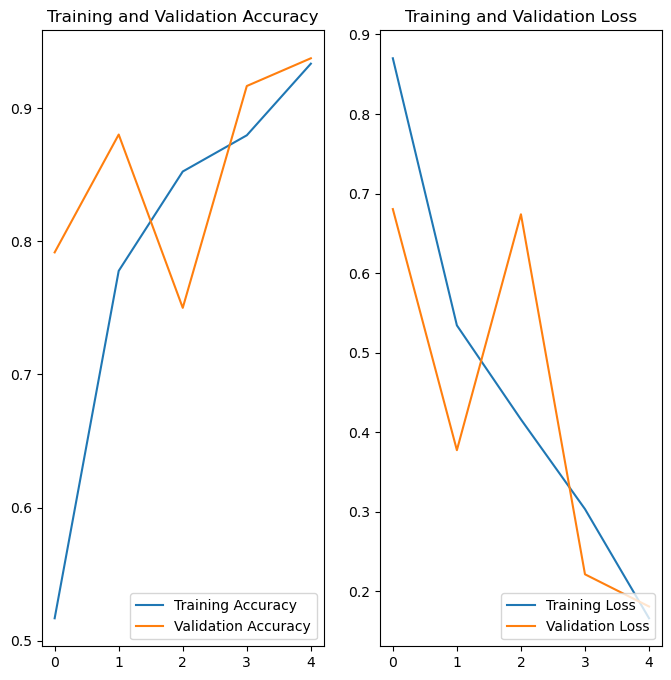

In [44]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc ,label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc ,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title("Training and Validation Accuracy")

plt.subplot(1,2,2)
plt.plot(range(EPOCHS), loss ,label='Training Loss')
plt.plot(range(EPOCHS), val_loss ,label='Validation Loss')
plt.legend(loc='lower right')
plt.title("Training and Validation Loss")
plt.show()

First Image to Predict
First image's actual label: Potato___Late_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 871ms/step
Predicted label:  Potato___Late_blight


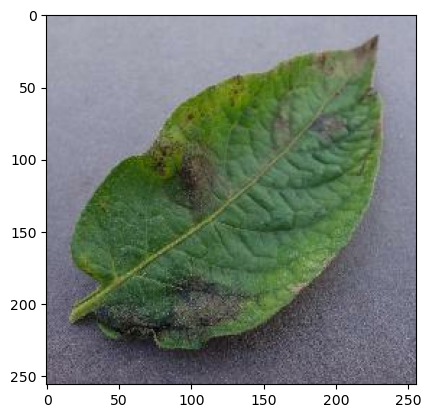

In [60]:
for image_batch ,labels_batch in test_dataset.take(1):
    
         first_image = image_batch[0].numpy().astype('uint8')
         first_label = labels_batch[0]
            
         print("First Image to Predict")
         plt.imshow(first_image)
         print("First image's actual label:",class_names[first_label.numpy()])
        
         batch_prediction = model.predict(image_batch)
         print("Predicted label: ",class_names[np.argmax(batch_prediction[0])])

In [70]:
def predict(model,img):
     img_array =tf.keras.preprocessing.image.img_to_array(images[i].numpy())
     img_array=tf.expand_dims(img_array,0)
    
     predictions = model.predict(img_array)
        
     predicted_class = class_names[np.argmax(predictions[0])]
     confidence = round(100 * (np.max(predictions[0])),2)
     return predicted_class,confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


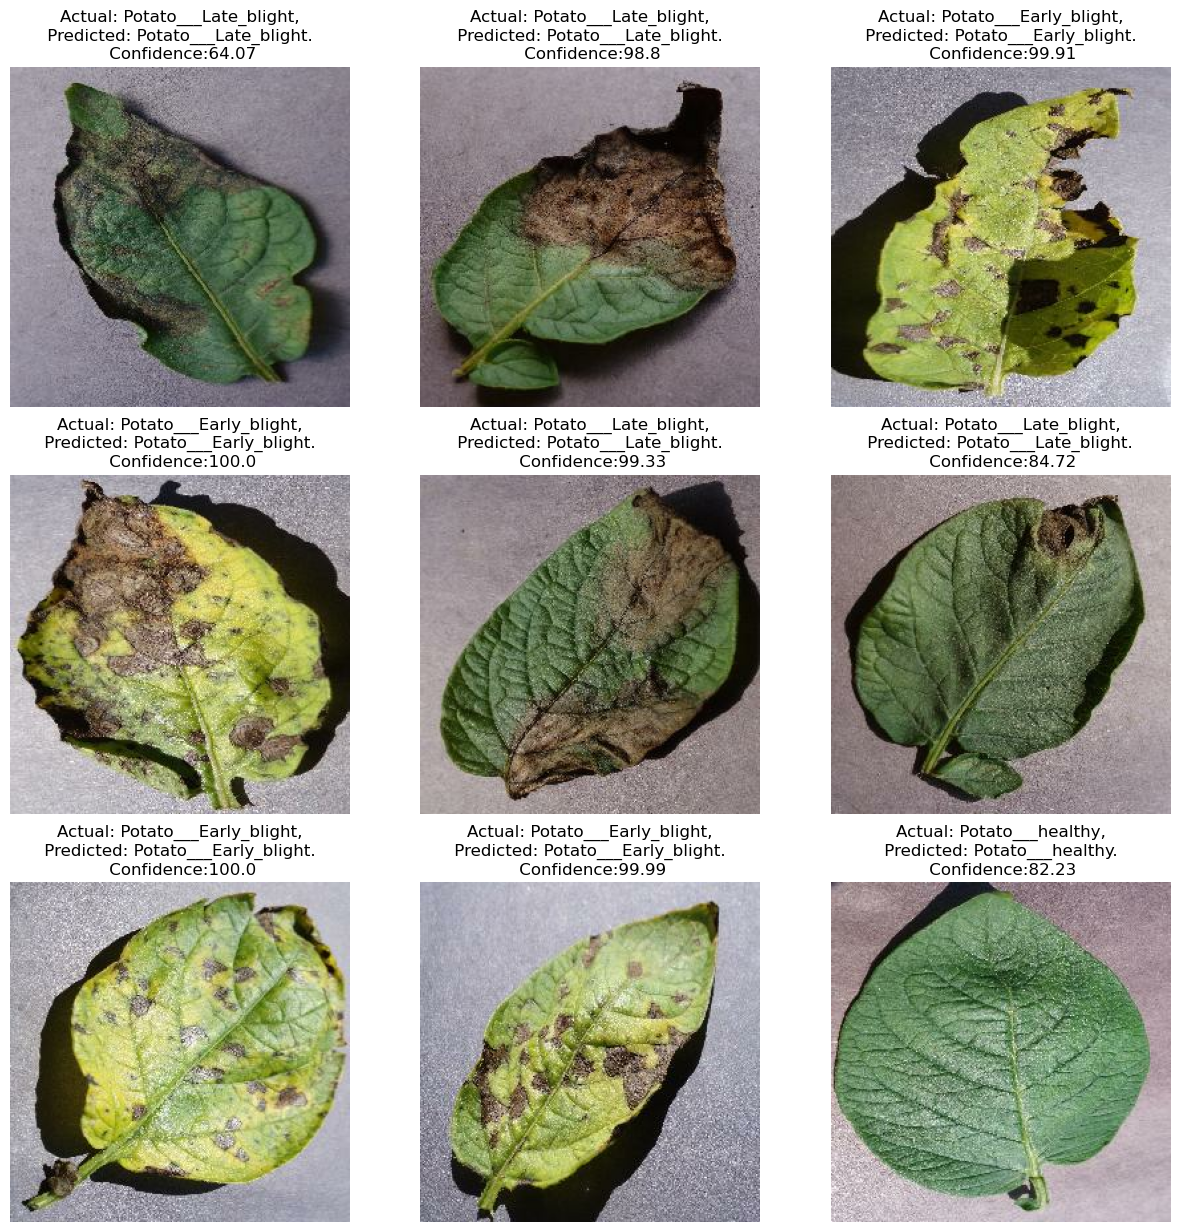

In [73]:
plt.figure(figsize=(15,15))
for images,labels in test_dataset.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class ,confidence = predict(model,images[i].numpy())
        actual_class = class_names[labels[i]]
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}. \n Confidence:{confidence}")
        plt.axis('off')

In [88]:
import os 

# Get the list of filenames in the directory
filenames = os.listdir('../models')

# Extract the numeric part from each filename and convert it to integers
model_numbers = [int(filename.split('.')[0]) for filename in filenames]

# If there are no models in the directory, set model_version to 0, otherwise, set it to the maximum model number plus 1
model_version = max(model_numbers) + 1 if model_numbers else 0

# Save the model with the new model version
model.save(f"../models/{model_version}.keras")
